# Wiskundig Model EE2
Om er voor te zorgen dat het model juist werkt kan je best 'Run All' gebruiken. Voor het plotten van de grafiek is de library matplotlib gebruikt.

## Inputgegevens
Bij de input en output is 4 het hoogste en 1 het laagste.
Step zorgt ervoor dat het aantal berekende punten aangepast kan worden.

In [21]:
# Algemene constanten
g = 9.81
step = 0.01

# Eigenschappen van de machine
m1 = 1
m2 = 1.005
H = [0.075, 0.110]
Hval = [0.05]
L = [0.400, 0.850]
stophoogte = 0.25

# Zelf te kiezen
inputhoogte = 4
outputhoogte = 4


## Programma

In [22]:
# Import en algemene code
import math

# Initialisering 
t = []
x = []
v = []
xtot = 0

# Algemene kinetische berekeningen voor een fysisch mechanisme
def xvalue(a,t,v0):
    return v0*t+a*t**2/2

def vvalue(a,t,v0):
    return v0+a*t

def mechanism(xmax, a):
    global t,x,v,xtot
    ttemp = []
    xtemp = []
    vtemp = []
    while(True):
        ttemp.append(len(t)*step+len(ttemp)*step)
        xtemp.append(xvalue(a,len(ttemp)*step,0))
        vtemp.append(vvalue(a,len(ttemp)*step,0))
        if(max(xtemp)>=xmax):
            break
    t += ttemp
    x += xtemp
    v += vtemp
    xtot += max(xtemp)

# Berekeningen voor de specifieke mechanismen
def helling(H,L):
    a = g*H/math.sqrt(H**2+L**2)
    xmax = math.sqrt(H**2+L**2)
    mechanism(xmax,a)
    
def katrol(m1,m2,H):
    a = g*(m2-m1)/(m1+m2)
    xmax = H
    mechanism(xmax,a)
    
def val(H):
    a = g
    xmax = H
    mechanism(xmax,a)

# Algoritme voor onze specifieke machine
def machine(inputhoogte, outputhoogte):
    for i in range(0, (inputhoogte-1)*2):
        helling(H[0],L[0])
        val(Hval[0])
    helling(H[1],L[1])
    val(Hval[0])
    katrol(m1,m2,outputhoogte*stophoogte)

    
machine(inputhoogte, outputhoogte)

## Grafiek
De grafiek x(t) geeft de afgelegde afstand weer die de bal aflegt per obstakel. Dus niet de totale afstand over de tijd.

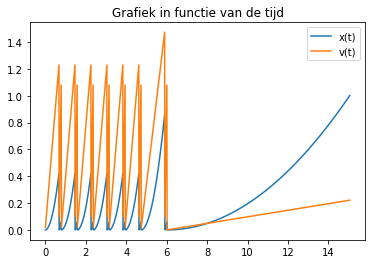

In [23]:
# Code voor plotten van grafiek
import matplotlib.pyplot as plt
%matplotlib inline

plt.plot(t,x, label="x(t)")
plt.plot(t,v, label="v(t)")
plt.title("Grafiek in functie van de tijd")
plt.legend()
plt.show()

## Bereikte waarden
Vooral de totale tijd en hoogste snelheid zijn hier belangrijk. Als deze niet binnen de grenswaarden liggen kan het gewicht van de lift aangepast worden zodat de gevraagde waarden wel bereikt worden.

In [24]:
print("Totale tijd:", round(max(t),2), "s")
print("Hoogste snelheid:", round(max(v),2), "m/s")
print("Totale afstand:", round(xtot,2) ,"m")

Totale tijd: 15.06 s
Hoogste snelheid: 1.47 m/s
Totale afstand: 4.79 m


## Aanmaken csv file
Dit csv bestand kan eventueel in excel geimporteerd worden.

In [25]:
import csv

def makecsv():
    with open('data.csv', 'w', newline='') as f:
        thewriter = csv.writer(f)  
        thewriter.writerow(['t','x','v'])
        
        for i in range(0,len(t)):        
            thewriter.writerow([t[i],x[i],v[i]])
            
makecsv()